# Three Simple Examples of Auto Encoders


## One layer with sigmoid activation

In [1]:
# Load libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data # why does it fail the first time??? (bug?)

In [4]:
# Import MNIST data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [41]:
# Training Parameters
learning_rate = 0.01
num_steps = 200000
batch_size = 256

# Optional testing parameters
display_step = 5000
examples_to_show = 10

# Network Parameters
num_hidden = 64 # 1st layer num features
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

# Setup and initialise weights
weights = {
    'encoder': tf.Variable(tf.random_normal([num_input, num_hidden])),
    'decoder': tf.Variable(tf.random_normal([num_hidden, num_input]))
}
biases = {
    'encoder': tf.Variable(tf.random_normal([num_hidden])),
    'decoder': tf.Variable(tf.random_normal([num_input])),
}

In [6]:
# Encoder 
Xhash = tf.nn.sigmoid(tf.add(tf.matmul(X, weights['encoder']), biases['encoder']))

# Decoder
Xhat = tf.nn.sigmoid(tf.add(tf.matmul(Xhash, weights['decoder']), biases['decoder']))

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(X - Xhat, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Launch the graph in a session.
sess = tf.Session()

# Run the initializer
sess.run(init)

In [8]:
# Training

for i in range(1, num_steps + 1):
    
    # Get the next batch of MNIST data & add random noise
    batch_X, _ = mnist.train.next_batch(batch_size)
    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_X})
    
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.413058
Step 5000: Minibatch Loss: 0.038888
Step 10000: Minibatch Loss: 0.035248
Step 15000: Minibatch Loss: 0.028445
Step 20000: Minibatch Loss: 0.029858
Step 25000: Minibatch Loss: 0.027072
Step 30000: Minibatch Loss: 0.024607
Step 35000: Minibatch Loss: 0.020899
Step 40000: Minibatch Loss: 0.019951
Step 45000: Minibatch Loss: 0.018404
Step 50000: Minibatch Loss: 0.018307
Step 55000: Minibatch Loss: 0.016701
Step 60000: Minibatch Loss: 0.016710
Step 65000: Minibatch Loss: 0.017443
Step 70000: Minibatch Loss: 0.015688
Step 75000: Minibatch Loss: 0.015415
Step 80000: Minibatch Loss: 0.016840
Step 85000: Minibatch Loss: 0.013338
Step 90000: Minibatch Loss: 0.013651
Step 95000: Minibatch Loss: 0.014081
Step 100000: Minibatch Loss: 0.013058


### Compression

In [9]:
# Testing with noise images

# Encode and decode images from test set and visualize their reconstruction.
n = 4
hash_width = int(np.sqrt(num_hidden))
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
canvas_hash = np.empty((hash_width * n, hash_width * n))
noise_factor = 0.0;

for i in range(n):
    
    # MNIST test set
    batch_X, _ = mnist.test.next_batch(n)
    batch_X += np.random.normal(loc = 0.0, scale = noise_factor, size = batch_X.shape) 
        
    # Encode and decode the digit image
    batch_Xhash, batch_Xhat = sess.run([Xhash, Xhat], feed_dict={X: batch_X})

    # Display original images
    for j in range(n):
        # Draw the original digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_X[j].reshape([28, 28])
            
    # Display reconstructed images
    for j in range(n):
        # Draw the reconstructed digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_Xhat[j].reshape([28, 28])
            
    # Hashes
    for j in range(n):
        # Draw the reconstructed digits
        canvas_hash[i * hash_width:(i + 1) * hash_width, j * hash_width:(j + 1) * hash_width] = batch_Xhash[j].reshape([hash_width, hash_width])

Original Images


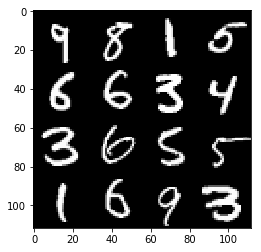

Reconstructed Images


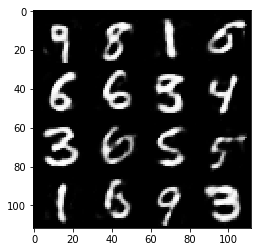

Encodings


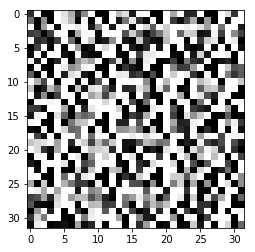

In [10]:
print("Original Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

print("Encodings")
plt.figure(figsize=(n, n))
plt.imshow(canvas_hash, origin="upper", cmap="gray")
plt.show()

### Denoising

In [27]:
# Testing with noise images

# Encode and decode images from test set and visualize their reconstruction.
n = 4
hash_width = int(np.sqrt(num_hidden))
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
canvas_hash = np.empty((hash_width * n, hash_width * n))
noise_factor = 0.10;

for i in range(n):
    
    # MNIST test set
    batch_X, _ = mnist.test.next_batch(n)
    batch_X += np.random.normal(loc = 0.0, scale = noise_factor, size = batch_X.shape) 
        
    # Encode and decode the digit image
    batch_Xhash, batch_Xhat = sess.run([Xhash, Xhat], feed_dict={X: batch_X})

    # Display original images
    for j in range(n):
        # Draw the original digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_X[j].reshape([28, 28])
            
    # Display reconstructed images
    for j in range(n):
        # Draw the reconstructed digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_Xhat[j].reshape([28, 28])
            
    # Hashes
    for j in range(n):
        # Draw the reconstructed digits
        canvas_hash[i * hash_width:(i + 1) * hash_width, j * hash_width:(j + 1) * hash_width] = batch_Xhash[j].reshape([hash_width, hash_width])

Original Images


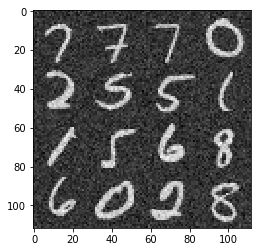

Reconstructed Images


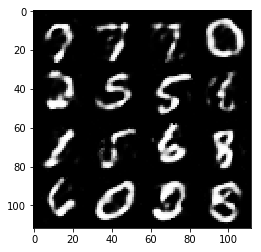

Encodings


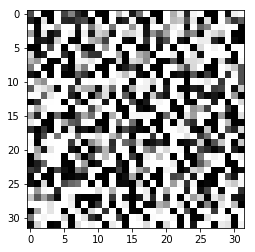

In [28]:
print("Original Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

print("Encodings")
plt.figure(figsize=(n, n))
plt.imshow(canvas_hash, origin="upper", cmap="gray")
plt.show()

## Adding a penalizer

In [19]:
# Define loss and optimizer, minimize the squared error
l1_penalizer = 5e-6 * tf.reduce_sum(tf.abs(Xhash))
loss = tf.reduce_mean(tf.pow(X - Xhat, 2)) + l1_penalizer
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [20]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Launch the graph in a session.
sess2 = tf.Session()

# Run the initializer
sess2.run(init)


for i in range(1, num_steps + 1):
    
    # Get the next batch of MNIST data & add random noise
    batch_X, _ = mnist.train.next_batch(batch_size)
    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess2.run([optimizer, loss], feed_dict={X: batch_X})
    
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.456526
Step 5000: Minibatch Loss: 0.068415
Step 10000: Minibatch Loss: 0.054420
Step 15000: Minibatch Loss: 0.045863
Step 20000: Minibatch Loss: 0.041956
Step 25000: Minibatch Loss: 0.038620
Step 30000: Minibatch Loss: 0.034664
Step 35000: Minibatch Loss: 0.033578
Step 40000: Minibatch Loss: 0.032185
Step 45000: Minibatch Loss: 0.029844
Step 50000: Minibatch Loss: 0.028773
Step 55000: Minibatch Loss: 0.029298
Step 60000: Minibatch Loss: 0.029368
Step 65000: Minibatch Loss: 0.028229
Step 70000: Minibatch Loss: 0.026200
Step 75000: Minibatch Loss: 0.026440
Step 80000: Minibatch Loss: 0.025510
Step 85000: Minibatch Loss: 0.025678
Step 90000: Minibatch Loss: 0.025793
Step 95000: Minibatch Loss: 0.024573
Step 100000: Minibatch Loss: 0.025400


In [25]:
# Testing with noise images

# Encode and decode images from test set and visualize their reconstruction.
n = 4
hash_width = int(np.sqrt(num_hidden))
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
canvas_hash = np.empty((hash_width * n, hash_width * n))
noise_factor = 0.1;

for i in range(n):
    
    # MNIST test set
    batch_X, _ = mnist.test.next_batch(n)
    batch_X += np.random.normal(loc = 0.0, scale = noise_factor, size = batch_X.shape) 
        
    # Encode and decode the digit image
    batch_Xhash, batch_Xhat = sess2.run([Xhash, Xhat], feed_dict={X: batch_X})

    # Display original images
    for j in range(n):
        # Draw the original digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_X[j].reshape([28, 28])
            
    # Display reconstructed images
    for j in range(n):
        # Draw the reconstructed digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_Xhat[j].reshape([28, 28])
            
    # Hashes
    for j in range(n):
        # Draw the reconstructed digits
        canvas_hash[i * hash_width:(i + 1) * hash_width, j * hash_width:(j + 1) * hash_width] = \
        batch_Xhash[j].reshape([hash_width, hash_width])

Original Images


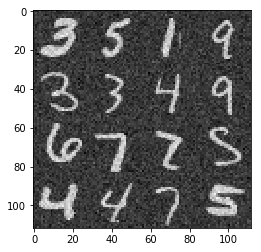

Reconstructed Images


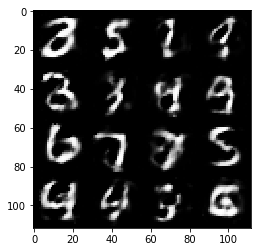

Hashed Images


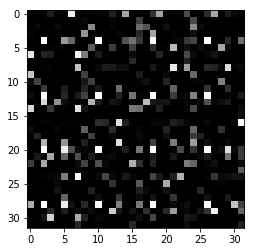

In [26]:
print("Original Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

print("Hashed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_hash, origin="upper", cmap="gray")
plt.show()

## Adding another layer

In [44]:
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 64 # 2nd layer num features 

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Define encodings
Xhash = tf.nn.sigmoid(tf.add(tf.matmul(X, weights['encoder_h1']), biases['encoder_b1']))
Xhashhash = tf.nn.sigmoid(tf.add(tf.matmul(Xhash, weights['encoder_h2']), biases['encoder_b2']))

# Define decodings
Xhashhat = tf.nn.sigmoid(tf.add(tf.matmul(Xhashhash, weights['decoder_h1']), biases['decoder_b1']))
Xhat = tf.nn.sigmoid(tf.add(tf.matmul(Xhashhat, weights['decoder_h2']), biases['decoder_b2']))

# Define loss and optimizer, minimize the squared error
l1_penalizer_1 = 5e-7 * tf.reduce_sum(tf.abs(Xhash))
l1_penalizer_2 = 5e-6 * tf.reduce_sum(tf.abs(Xhashhash))
loss = tf.reduce_mean(tf.pow(X - Xhat, 2)) + l1_penalizer_1 + l1_penalizer_2
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [45]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Launch the graph in a session.
sess3 = tf.Session()

# Run the initializer
sess3.run(init)


for i in range(1, num_steps + 1):
    
    # Get the next batch of MNIST data & add random noise
    batch_X, _ = mnist.train.next_batch(batch_size)
    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess3.run([optimizer, loss], feed_dict={X: batch_X})
    
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.505768
Step 5000: Minibatch Loss: 0.035188
Step 10000: Minibatch Loss: 0.025414
Step 15000: Minibatch Loss: 0.023770
Step 20000: Minibatch Loss: 0.020844
Step 25000: Minibatch Loss: 0.020073
Step 30000: Minibatch Loss: 0.020188
Step 35000: Minibatch Loss: 0.018520
Step 40000: Minibatch Loss: 0.017458
Step 45000: Minibatch Loss: 0.018667
Step 50000: Minibatch Loss: 0.018717
Step 55000: Minibatch Loss: 0.017247
Step 60000: Minibatch Loss: 0.016101
Step 65000: Minibatch Loss: 0.017180
Step 70000: Minibatch Loss: 0.017257
Step 75000: Minibatch Loss: 0.017670
Step 80000: Minibatch Loss: 0.016322
Step 85000: Minibatch Loss: 0.016407
Step 90000: Minibatch Loss: 0.016790
Step 95000: Minibatch Loss: 0.016666
Step 100000: Minibatch Loss: 0.016405
Step 105000: Minibatch Loss: 0.017165
Step 110000: Minibatch Loss: 0.017150
Step 115000: Minibatch Loss: 0.016167
Step 120000: Minibatch Loss: 0.015193
Step 125000: Minibatch Loss: 0.015997
Step 130000: Minibatch Loss: 0.016474

In [68]:
# Testing with noise images

# Encode and decode images from test set and visualize their reconstruction.
n = 4
hash_width = int(np.sqrt(num_hidden_1))
hashhash_width = int(np.sqrt(num_hidden_2))
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
canvas_hash = np.empty((hash_width * n, hash_width * n))
canvas_hashhash = np.empty((hashhash_width * n, hashhash_width * n))
noise_factor = 0.2;

for i in range(n):
    
    # MNIST test set
    batch_X, _ = mnist.test.next_batch(n)
    batch_X += np.random.normal(loc = 0.0, scale = noise_factor, size = batch_X.shape) 
        
    # Encode and decode the digit image
    batch_Xhashhash, batch_Xhash, batch_Xhat = sess3.run([Xhashhash, Xhash, Xhat], feed_dict={X: batch_X})

    # Display original images
    for j in range(n):
        # Draw the original digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_X[j].reshape([28, 28])
            
    # Display reconstructed images
    for j in range(n):
        # Draw the reconstructed digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_Xhat[j].reshape([28, 28])
            
    # Hashes
    for j in range(n):
        # Draw the reconstructed digits
        canvas_hash[i * hash_width:(i + 1) * hash_width, j * hash_width:(j + 1) * hash_width] = \
        batch_Xhash[j].reshape([hash_width, hash_width])
    
    # HashHashes
    for j in range(n):
        # Draw the reconstructed digits
        canvas_hashhash[i * hashhash_width:(i + 1) * hashhash_width, j * hashhash_width:(j + 1) * hashhash_width] = \
        batch_Xhashhash[j].reshape([hashhash_width, hashhash_width])


Original Images


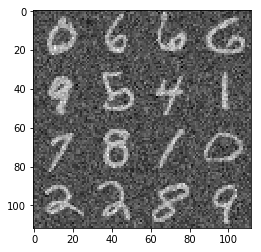

Reconstructed Images


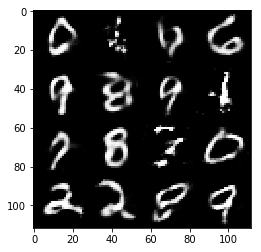

Hashed Images


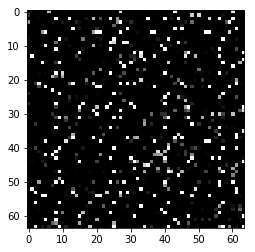

Hashed Hashed Images


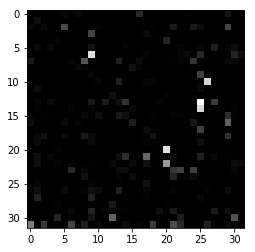

In [69]:
print("Original Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

print("Hashed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_hash, origin="upper", cmap="gray")
plt.show()

print("Hashed Hashed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_hashhash, origin="upper", cmap="gray")
plt.show()